#**DIAGONSIS OF PNEUMONIA USING DEEP LEARNING**#

# **INTRODUCTION**

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known
as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain,
fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually
caused by infection with viruses or bacteria and less commonly by other microorganisms, certain
medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis,
chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of
smoking, a poor ability to cough such as following a stroke and a weak immune system.
Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and
culture of the sputum may help confirm the diagnosis.The disease may be classified by where it
was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia


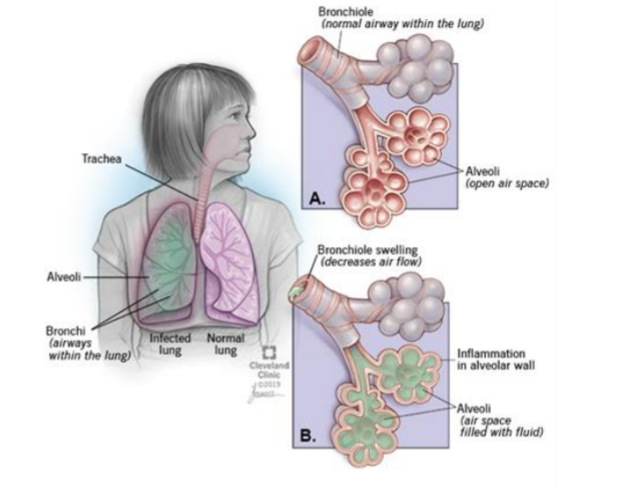

##**PICTURE OF NORMAL LUNGS**

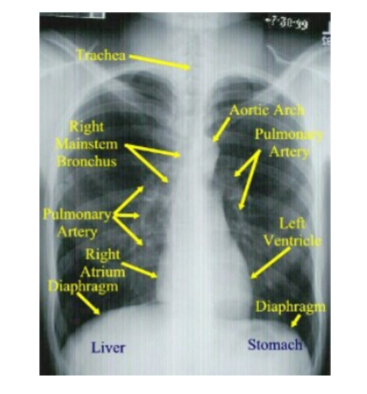

##**LIBARY**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing import image
import cv2
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from PIL import Image, ImageOps
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import keras.backend as K
from numpy.random import seed
from keras.layers import Input, Dense,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from keras.models import Model
import random as rn
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping
from numpy.random import seed
import random as rn
import tensorflow.keras.backend as K
import tensorflow as tf
import tensorflow
from sklearn.utils import class_weight
import keras
from keras import initializers
from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import itertools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


##**FUNCTION-1**


##**PRE-PROCESSING**

**DATA-AUGMENTATION**

Image data augmentation is a technique that can be used to articially expand the size of a training
dataset by creating modied versions of images in the dataset.
Training deep learning neural network models on more data can result in more skillful models, and the
augmentation techniques can create variations of the images that can improve the ability of the t models
to generalize what they have learned to new images.
The Keras deep learning neural network library provides the capability to t models using image data
augmentation via the ImageDataGenerator class. we implemented Horizontal Flip Augmentation, Rotation
Augmentation,Zoom Augmentation, Shear Range Augmentation,Vertical Shift.

**height_shift_range** arguments to the ImageDataGenerator constructor control the amount of vertical shift.

**rotation_range argument**, with rotations to the image between 0 and 90 degrees.

**horizontal flip** an image ip means reversing the rows or columns of pixels.

**zoom_range**argument A zoom augmentation randomly zooms the image in and either adds new pixel
values around the image.

**shear_range** Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

## **FORMULA USED FOR EVALUATION**

**Recall** calculates how many of the Actual Positives our model capture through labeling it as Positive (True
Positive). We know that Recall shall be the model metric we use to select our best model when there is a
high cost associated with False Negative.

**Precision** talks about how precise/accurate your model is out of those predicted positive, how many of
them are actual positive.

**F1 Score** might be a better measure to use if we need to seek a balance between Precision and Recall and
there is an imbalanced dataset (large number of Actual Negatives).


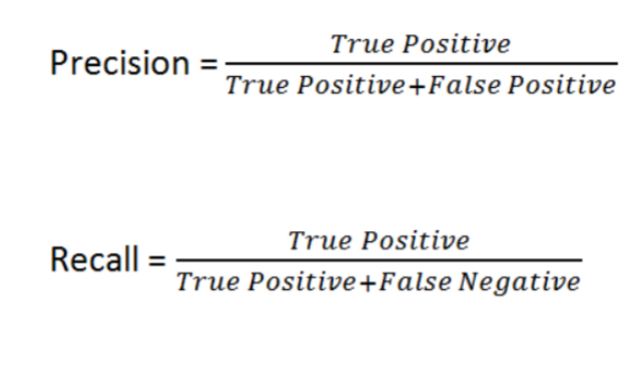

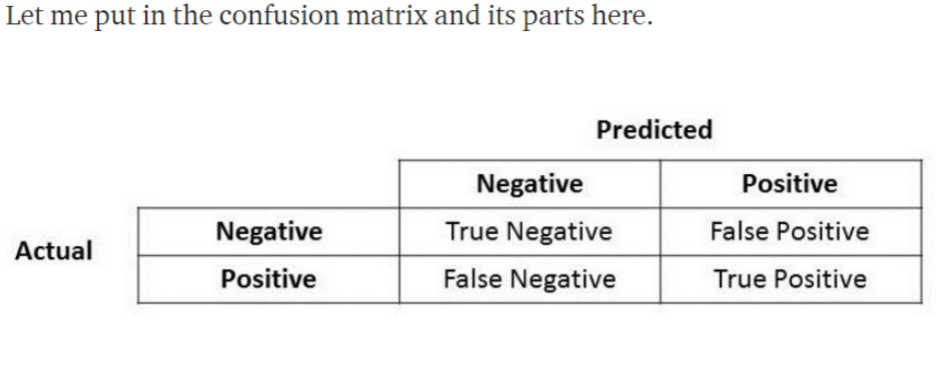

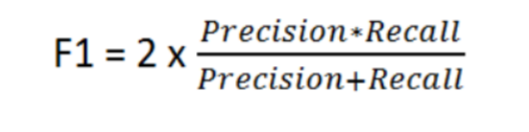

##**REFERENCES**

Diagnosis of Pneumonia from Chest X-Ray Images using Deep Learning

IEEE paper released in year 2019 written by Enes AYAN

 https://ieeexplore.ieee.org/document/8741582


https://www.kaggle.com/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia
https://www.kaggle.com/joythabo33/99-accurate-cnn-that-detects-pneumonia



#**FUNCTION-1**

In [62]:
def final_fun_1(X):
  img1=[]
  start_time = time.time()
  height=150
  width=150
  size=(height,width)
  def f1_metric(y_true, y_pred):
          true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
          possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
          predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
          precision = true_positives / (predicted_positives + K.epsilon())
          recall = true_positives / (possible_positives + K.epsilon())
          f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
          return f1_val
  if isinstance(X,str):
          img=cv2.imread(X,cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (150, 150))
          a = img.reshape(1,150,150,1)
          model = load_model('/content/drive/My Drive/best2_model.h5',custom_objects={ 'metric': f1_metric },compile=False)
          a1=model.predict(a)
          y_pred=np.argmax(a1,axis=1)
          print(y_pred)
  else:

     for i in range(0,len(X)):
          
          img=cv2.imread(X.values[i][0],cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (150, 150))
          img1.append(img)
     img2=np.asarray(img1)
     a = img2.reshape(len(X),150,150,1)
     model = load_model('/content/drive/My Drive/best2_model.h5',custom_objects={ 'metric': f1_metric },compile=False)
     a1=model.predict(a)
     y_pred=np.argmax(a1,axis=1)
     

  return y_pred

#**FUNTION-2**

In [75]:
def final_fun_2(X,y):
  
  img1=[]
  height=150
  width=150
  size=(height,width)
  def f1_metric(y_true, y_pred):
          true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
          possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
          predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
          precision = true_positives / (predicted_positives + K.epsilon())
          recall = true_positives / (possible_positives + K.epsilon())
          f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
          return f1_val
  if isinstance(X,str):
          img=cv2.imread(X,cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (150, 150))
          a = img.reshape(1,150,150,1)
          model = load_model('/content/drive/My Drive/best2_model.h5',custom_objects={ 'metric': f1_metric },compile=False)
          a1=model.predict(a)
          y_pred=np.argmax(a1,axis=1)
          print(y_pred)
  else:

     for i in range(0,len(X)):
          
          img=cv2.imread(X.values[i][0],cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (150, 150))
          img1.append(img)
     img2=np.asarray(img1)
     a = img2.reshape(len(X),150,150,1)
     model = load_model('/content/drive/My Drive/best2_model.h5',custom_objects={ 'metric': f1_metric },compile=False)
     a1=model.predict(a)
     y_pred=np.argmax(a1,axis=1)
    
  y_pred=np.sort(y_pred)
  def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  cnf_matrix = confusion_matrix(y,y_pred,labels=[0,1,2])
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=[0,1,2],title='Confusion matrix, without normalization')
  print("MISCLASSFICATION RATE ",(len(y)-np.trace(cnf_matrix))/len(y)*100)
  print("THE F1-SCORE: ",f1_score(y, y_pred, average="macro"))
  print("*"*100)
  print("THE PRECISION OF MODEL: ",precision_score(y, y_pred, average="macro"))
  print("*"*100)
  print("THE RECALL SCORE: ",recall_score(y, y_pred, average="macro")) 
  print("*"*100)   
  print(classification_report(y, y_pred, labels=[0, 1, 2]))
  return cnf_matrix

# **PREDICTION**


In [ ]:
y_pred=final_fun_1('/content/drive/My Drive/test/PNEUMONIA/person1608_virus_2786.jpeg')

[2]


In [ ]:

y_pred=final_fun_1(X)

In [ ]:
cleanup_nums = {"LABEL":     {'NORMAL': 0,'BACTERIA':1,'VIRUS':2}}
X.replace(cleanup_nums, inplace=True)
y_true=X['LABEL']
y_true=np.asarray(y_true)
y_true=np.sort(y_true)

Confusion matrix, without normalization
[[234   0   0]
 [ 44 198   0]
 [  0   9 139]]
MISCLASSFICATION RATE  8.493589743589745
THE F1-SCORE:  0.9215545086319062
****************************************************************************************************
THE PRECISION OF MODEL:  0.9327494526118235
****************************************************************************************************
THE RECALL SCORE:  0.9191236691236692
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       234
           1       0.96      0.82      0.88       242
           2       1.00      0.94      0.97       148

    accuracy                           0.92       624
   macro avg       0.93      0.92      0.92       624
weighted avg       0.92      0.92      0.91       624



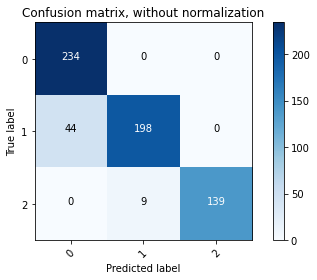

In [ ]:
final_fun_2(X,y_true)

##**TENSORBOARD SCREENSHOTS**

##**ACCURACY**

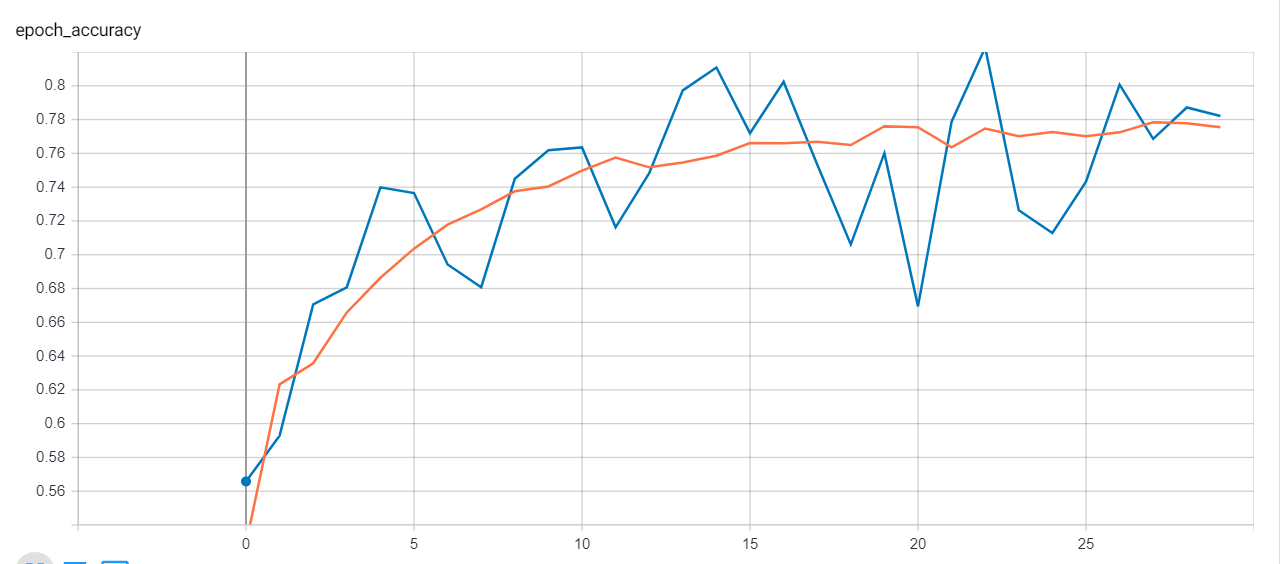

##**F1-METRIC**

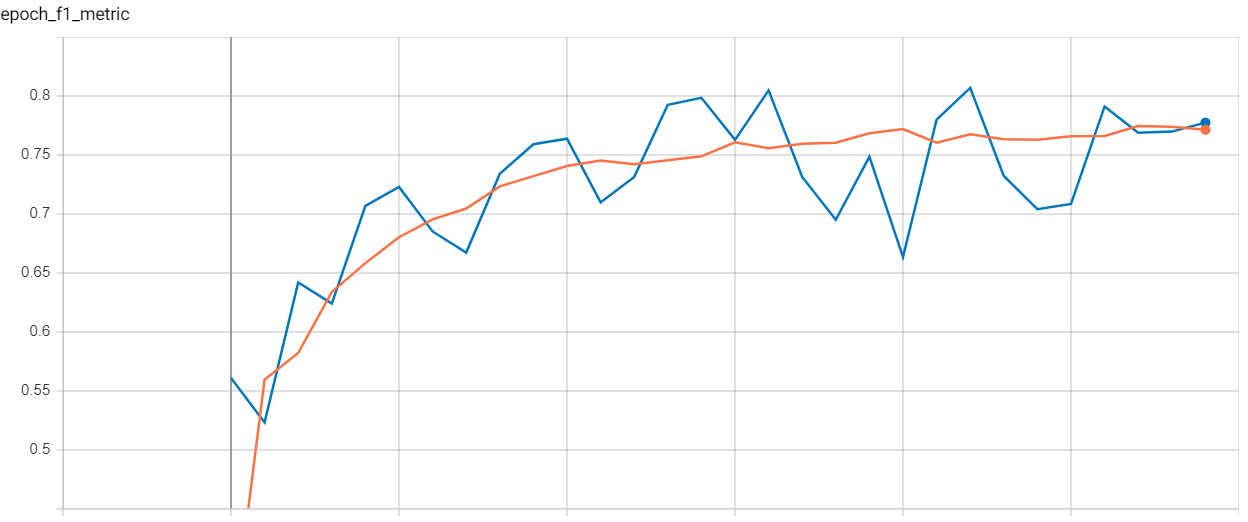

##**LOSS**

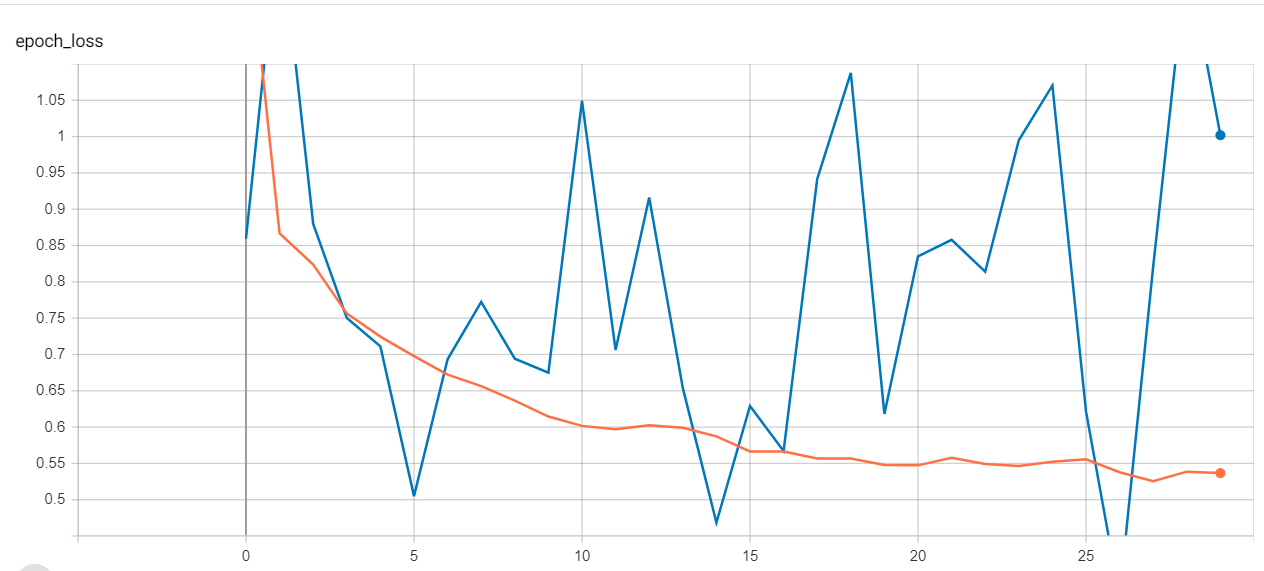

## **GRAPH OBSERVATION**


**F1-METRIC:**

The graph is not overtting but validation f1-metric is not stable . It keeps on uctuating it is non-linear in
nature. The train-curve is almost linear and tends to saturate at 0.8 and the validation curve has the
maximum peak above 0.8 but eventually model trie to follow the training curve.

**ACCURACY**

The graph is very much similar to f1-metric,graph is not overtting but validation f1-metric is not stable . It
keeps on uctuating it is non-linear in nature. The train-curve is almost linear and tends to saturate at 0.8
and the validation curve has the maximum peak above 0.8 but eventually model trie to follow the training
curve.

**LOSS**

The loss graph till 28 epochs both train and validation curves are trying to reduce the loss but after 28th
epoch the validation curve tends to increase wheras the traiin curve is still reducing .

## **METRIC COMPARSION**

Based on classication report the f1-score for PNEMONIA-VIRUS is high and NORMAL and viral pneumonia
is also high and the recall for normal is 1.00 hence the model is perefctly works well on predicting the
normal or pnemonia patients and if there is any pnemonia then it is also helpful to predict whether it is
bacteria or viral. The recalll for pneuomonia bacteria is 0.82 which is acceptable for bacteria profile and f1 score is also low
compared to other categories.


## **CONFUSION MATRIX**

The 0-0 ie true-normal and predicted-normal is 234 which is almost the whole normal samples in test
dataset.
 0-1 ie, true-normal and falsely predicted pneumonia and falesly prediced viral pneumonia both are
zero. which means our model can easily predict normal lungs than pneumonia lungs.

1-0 it true pneumonia bacteria and fasely predicted normal is 44 which means 44 people who have
pnuemonia is predicted as normal people.

1-1 ie true pneumonia bacteria and true predicted bacterua is 199 which is more than 50 %  
% of our total bacterial samples in test data.

2-1 ie true bacteria vs falsely predicted viral is 9 and it is acceptable since our main focus is to predict
normal or pneumonia then only bacteria or viral so even it is predicted as bacteria further more real time
medical test can predict its truness.

2-0 and 1-2 both are zero which means there is falsely predicted viral samples in dataset.

 2-2 is 139
which is nearly 100 % of test data samples.
from confusion matrix we come to conclusion that the our model is better than 




## **SUMMARY**

Our models are implemnted to predict the pnuemonia - viral or bacterial and normal lungs and reulst are
well anlaysed .
The best models is **CNN**. The models showed promising results in
prediction of chest X-ray images.